In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import plotly.express as px
import example_Ising_loader as loader

params = {'mathtext.fontset' : 'stix',
          'font.family'      : 'sans-serif',
          'font.sans-serif':['Helvetica'],
          'font.size'        : 9,   
          'text.usetex'      : True,
          'text.latex.preamble':r"""
                  \usepackage{type1cm}
                  \usepackage{amssymb}
                  \usepackage{amsmath}
                  \usepackage[varg]{txfonts}
                  \usepackage{newtxtext}
                  \usepackage{bm}
                  \usepackage{helvet}
                  \usepackage{tikz}
                  \usepackage{sansmath}
                  \sansmath
                  \newcommand{\nosans}[1]{\unsansmath #1\sansmath}
                  % \newcommand{\tikzmark}[1]{
                  %       \begin{tikzpicture}[baseline=0.0]
                  %       \draw[thick] (-2, 0.5) -- (-2, 0) -- (2, 0) -- (2, 0.5);
                  %       \node at (0, -0.5) {A#1};
                  %       \end{tikzpicture}
                  % }
                  """,
        "lines.linewidth": 1.0, # default=1.5
        "axes.labelpad": 1.5, # default=4.0
        "xtick.major.pad": 2.0, # default=3.5
        "ytick.major.pad": 2.0, # default=3.5
        "xtick.bottom": True,
        "ytick.left": True}
plt.rcParams.update(params)


mc = {"red": "tomato",
      "blue": "dodgerblue",
      "green": 'mediumseagreen'}

# geometric mean
def pd_gmean(df):
    return pd.Series(sp.stats.gmean(df), index=df.columns)

# plot options
symbol = {1: 'x', 2: '+', 3: 'o', 4: 's', 5: 'd', 6: '^', 7: 'v', 8: '<', 9: '>', 0: 'p'}
cmap_N = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=9-4, vmax=15+2), cmap=mpl.cm.GnBu).to_rgba
# cmap_N = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=9-3, vmax=15), cmap=mpl.cm.YlGn).to_rgba
cmap_N_alt = mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=9-3, vmax=15), cmap=mpl.cm.PuRd).to_rgba

## Load and test plots

In [ ]:
parent_folder = "data-main/"

K_list = loader.K_list
N_list = [9, 12, 15]
seed_list = np.arange(0, 100, dtype=int)

Hamiltonian_name_repr = "Gaussian"
driving_name_repr = "-YZ"
tmax_repr = 0.01

In [3]:
df = loader.load_final_overlap(Hamiltonian_name_list=[Hamiltonian_name_repr],
                               driving_name_list=[driving_name_repr],
                               seed_list=seed_list,
                               N_list=N_list,
                               tmax_list=[tmax_repr],
                               parent_folder=parent_folder)
df.drop(columns=['Hamiltonian', 'driving', 'tmax'], inplace=True)

# display(df[df['N'] == 9].sort_values(by="K=5"))
display(df[df['N'] == 15].head())

df_gain = df.copy()
df_gain['normalizer'] = df_gain['K=1'].copy()
for colname in [f'K={K}' for K in K_list]:
    df_gain[colname] = df_gain[colname] / df_gain['normalizer']

# df_gain = df_gain[df_gain["K=0"] < 0.1]

# display(df_gain[df_gain['N'] == 9].sort_values(by="K=5"))
display(df_gain[df_gain['N'] == 15].head())

,N,seed,K=0,K=1,K=2,K=3,K=4,K=5
200,15,0,0.000031,0.017914,0.025751,0.038368,0.056303,0.079016
201,15,1,0.000030,0.001008,0.002169,0.003865,0.006205,0.009238
202,15,2,0.000031,0.008424,0.016616,0.026148,0.039238,0.057144
203,15,3,0.000030,0.000291,0.000792,0.001522,0.002777,0.005042
204,15,4,0.000031,0.037319,0.033173,0.032231,0.032792,0.034024


,N,seed,K=0,K=1,K=2,K=3,K=4,K=5,normalizer
200,15,0,0.001704,1.0,1.437472,2.141787,3.142971,4.410853,0.017914
201,15,1,0.030246,1.0,2.150909,3.833211,6.154342,9.162134,0.001008
202,15,2,0.003626,1.0,1.972390,3.104000,4.657814,6.783419,0.008424
203,15,3,0.104323,1.0,2.717577,5.222955,9.533302,17.306767,0.000291
204,15,4,0.000818,1.0,0.888895,0.863648,0.878698,0.911708,0.037319


In [4]:
df_describe = df.groupby('N')[[f'K={K}' for K in K_list]].describe().reset_index()
display(df_describe)

df_gain_describe = df_gain.groupby('N')[[f'K={K}' for K in K_list]].describe().reset_index()
display(df_gain_describe)

N    K=0                                                              \
       count      mean       std       min       25%       50%       75%   
0   9  100.0  0.001953  0.000012  0.001863  0.001953  0.001954  0.001954   
1  12  100.0  0.000245  0.000007  0.000215  0.000244  0.000244  0.000244   
2  15  100.0  0.000031  0.000002  0.000030  0.000031  0.000031  0.000031   

               K=1  ...       K=4              K=5                      \
        max  count  ...       75%       max  count      mean       std   
0  0.001992  100.0  ...  0.432997  0.877528  100.0  0.352153  0.219231   
1  0.000308  100.0  ...  0.219834  0.550770  100.0  0.196925  0.154280   
2  0.000045  100.0  ...  0.104897  0.556355  100.0  0.101391  0.102452   

                                                     
        min       25%       50%       75%       max  
0  0.026059  0.185821  0.319664  0.512886  0.938210  
1  0.013291  0.075245  0.156503  0.266487  0.622010  
2  0.002282  0.031054  0.068297  0.135829  0.660635  

[3 rows x 49 columns]

N    K=0                                                              \
       count      mean       std       min       25%       50%       75%   
0   9  100.0  0.065016  0.135845  0.005390  0.011799  0.019719  0.049481   
1  12  100.0  0.013389  0.024226  0.000616  0.002970  0.005554  0.012342   
2  15  100.0  0.013085  0.063024  0.000214  0.000742  0.001963  0.005325   

               K=1  ...       K=4               K=5                      \
        max  count  ...       75%        max  count      mean       std   
0  0.976594  100.0  ...  3.539200  50.753227  100.0  5.369623  9.310540   
1  0.194916  100.0  ...  3.844069  18.914107  100.0  4.758714  4.445061   
2  0.620173  100.0  ...  5.354625  27.302788  100.0  6.531033  6.832009   

                                                      
        min       25%       50%       75%        max  
0  1.470893  2.422160  3.060942  4.500250  88.823201  
1  0.605841  2.186430  3.177074  5.156033  32.511918  
2  0.911708  2.787793  3.904834  7.236170  46.200724  

[3 rows x 49 columns]

In [5]:
df_energygap = loader.load_energygap(Hamiltonian_name_list=[Hamiltonian_name_repr],
                            driving_name_list=[driving_name_repr],
                            seed_list=seed_list,
                            N_list=N_list,
                            parent_folder=parent_folder)

df_energygap["name"] = df_energygap["N"].astype(str) + "_" + df_energygap["seed"].astype(str) + df_energygap["driving"]
df_energygap = df_energygap.set_index("name").drop(columns=["N", "seed", "driving", "Hamiltonian"])
display(df_energygap[(df_energygap['gap_min'] < 0.1) | (df_energygap['gap_absmin'] < 0.1)])
fig = px.scatter(df_energygap, log_y=True)

fig.write_image(f'{parent_folder}example_Ising_figure_summary_{Hamiltonian_name_repr}{driving_name_repr}_gap.pdf');

,gap_min,gap_absmin,gap_final,gap_max
name,,,,
9_4-YZ,0.069733,0.069733,0.103805,2.0
9_6-YZ,0.038133,0.038133,0.038133,2.0
9_20-YZ,0.079219,0.079219,0.135087,2.0
9_28-YZ,0.072555,0.072555,0.261630,2.0
9_45-YZ,0.051181,0.051181,0.405149,2.0
9_56-YZ,0.033435,0.033435,0.033435,2.0
9_58-YZ,0.074021,0.074021,0.074021,2.0
9_61-YZ,0.027567,0.027567,0.027567,2.0
9_66-YZ,0.014287,0.014287,0.014287,2.0


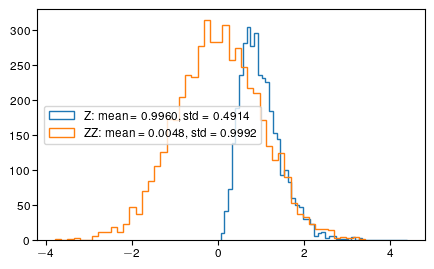

In [6]:
coeff_X, coeff_Z, coeff_ZZ = loader.load_Hamiltonian_coefficients(Hamiltonian_name=Hamiltonian_name_repr,
                                                                  driving_name=driving_name_repr,  
                                                                  seed_list=seed_list,
                                                                  N_list=N_list,
                                                                  parent_folder=parent_folder)

str_Z = f"Z:  mean = {np.mean(coeff_Z):.4f}, std = {np.std(coeff_Z):.4f}"
str_ZZ = f"ZZ: mean = {np.mean(coeff_ZZ):.4f}, std = {np.std(coeff_ZZ):.4f}"

fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.hist(coeff_Z, bins=50, histtype='step', stacked=True, label=str_Z)
ax.hist(coeff_ZZ, bins=50, histtype='step', stacked=True, label=str_ZZ)
ax.legend()
fig.savefig(f'{parent_folder}example_Ising_figure_summary_{Hamiltonian_name_repr}{driving_name_repr}_histogram.pdf', dpi=1200, bbox_inches='tight');

## Plot

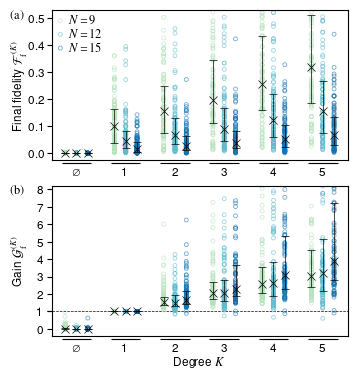

In [7]:
# ===== Prepare figure =====
fig = plt.figure(figsize=(3.4, 3.6))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

h_pos = {9: -0.23, 12: 0.0, 15: 0.23}
scatter_kwargs = lambda N, seed: {"marker": 'o', "facecolors": 'none', "edgecolors": cmap_N(N), 
                                  "s": 8, "linewidth": 0.6, "zorder": -1, "alpha": 0.6, "rasterized": True}
errorbar_kwargs = {"fmt": 'x', "color": 'black', "markersize": 6, "capsize": 3, 
                   "linewidth": 0.5, "capthick": 0.5, "markeredgewidth": 0.5, "zorder": 0}


# ===== Plot ax1 =====
for _, row in df.iterrows():
    N = row['N']
    seed = row['seed']
    
    labeltext = r'\nosans{$N\!=\!' + str(int(N)) + r'$}' if seed == 1 else None
    ax1.scatter(np.array(K_list) + 0.0*(seed-2) + h_pos[N], row[[f'K={K}' for K in K_list]], label=labeltext, **scatter_kwargs(N,seed))

for _, row in df_describe.iterrows():
    N = row[('N', '')]

    ave_value = row[[(f'K={K}', "50%") for K in K_list]].to_numpy()
    ave_upper = row[[(f'K={K}', "75%") for K in K_list]].to_numpy() - ave_value
    ave_lower = ave_value - row[[(f'K={K}', "25%") for K in K_list]].to_numpy()
    ax1.errorbar(np.array(K_list) + 0.0*(seed-2) + h_pos[N], ave_value, yerr=[ave_lower, ave_upper], **errorbar_kwargs)

ax1.set_xticks(K_list)
ax1.set_xticklabels([r'$\varnothing$'] + K_list[1:])


ax1.tick_params(axis='x', which='both', bottom=False, top=False, pad=1.5)
for K in K_list:
    polyline = mpl.patches.Polygon([(K-0.3,-0.02), (K-0.3,-0.02), (K+0.3,-0.02), (K+0.3,-0.02)], 
                                   closed=False, clip_on=False, edgecolor='k', facecolor='none', linewidth=0.8,
                                   transform=ax1.get_xaxis_transform()) # x: relative to axis, y: data coordinate
    ax1.add_patch(polyline)

ax1.legend(loc='upper left', bbox_to_anchor=(-0.03, 1.0), handletextpad=-0.4, borderaxespad=0.0, labelspacing=0.2, edgecolor='None', facecolor='None')


# ===== Plot ax2 =====
for _, row in df_gain.iterrows():
    N = row['N']
    seed = row['seed']
    
    ax2.scatter(np.array(K_list) + 0.0*(seed-2) + h_pos[N], row[[f'K={K}' for K in K_list]], **scatter_kwargs(N,seed))

for _, row in df_gain_describe.iterrows():
    N = row[('N', '')]

    ave_value = row[[(f'K={K}', "50%") for K in K_list]].to_numpy()
    ave_upper = row[[(f'K={K}', "75%") for K in K_list]].to_numpy() - ave_value
    ave_lower = ave_value - row[[(f'K={K}', "25%") for K in K_list]].to_numpy()
    ax2.errorbar(np.array(K_list) + 0.0*(seed-2) + h_pos[N], ave_value, yerr=[ave_lower, ave_upper], **errorbar_kwargs)

ax2.set_xticks(K_list)
ax2.set_xticklabels([r'$\varnothing$'] + K_list[1:])
ax2.set_xlabel(r'Degree \nosans{$K$}')
ax2.axhline(1.0, color='k', linestyle='--', linewidth=0.5, zorder=-2)

ax2.tick_params(axis='x', which='both', bottom=False, top=False, pad=1.5)
for K in K_list:
    polyline = mpl.patches.Polygon([(K-0.3,-0.02), (K-0.3,-0.02), (K+0.3,-0.02), (K+0.3,-0.02)], 
                                   closed=False, clip_on=False, edgecolor='k', facecolor='none', linewidth=0.8,
                                   transform=ax2.get_xaxis_transform()) # x: relative to axis, y: data coordinate
    ax2.add_patch(polyline)



# ===== Adjust legends etc. =====

if tmax_repr <= 0.1:
    # setup_case = {('ferromagnetic', ''):        (1.05263, 0.2, 11.999, 2, 0.12, 0.13),
    #               ('ferromagnetic', '-YZ'):     (1.05263, 0.2, 3.7, 1, 0.12, 0.13),
    #               ('antiferromagnetic', ''):    (0.0038, 0.001, 70, None, 0.155, 0.18),
    #               ('antiferromagnetic', '-YZ'): (None, 0.025, 11, 2, 0.155, 0.18),
    #               ('Gaussian', ''):             (0.85263, 0.2, 24, 5, 0.12, 0.13),
    #               ('Gaussian', '-YZ'):          (0.85263, 0.2, 5.8, 1, 0.12, 0.13)}
    setup_case = {('ferromagnetic', ''):        (1.05263, 0.2, 22, 4, 0.125, 0.14, 0),
                  ('ferromagnetic', '-YZ'):     (1.05263, 0.2, 4.4, 1, 0.125, 0.14, 0),
                  ('antiferromagnetic', ''):    (0.0032, 0.001, 90, None, 0.125, 0.14, 3),
                  ('antiferromagnetic', '-YZ'): (0.22, 0.1, 25, 4, 0.125, 0.14, 0),
                  ('Gaussian', ''):             (0.47, 0.1, 53, 10, 0.125, 0.14, 0),
                  ('Gaussian', '-YZ'):          (0.53, 0.1, 8.2, 1, 0.125, 0.14, 0)}

    ax1_max, ax1_tick, ax2_max, ax2_tick, leftsep, titlesep, multiple = setup_case[(Hamiltonian_name_repr, driving_name_repr)]
    if ax1_max is None: ax1_max = ax1.get_ylim()[1]
    if ax2_max is None: ax2_max = ax2.get_ylim()[1]
    ax1.set_ylim([-0.05*ax1_max, ax1_max])
    ax2.set_ylim([-0.05*ax2_max, ax2_max])
    if ax1_tick is not None: ax1.set_yticks(np.arange(0, ax1_max+1e-10, ax1_tick))
    if ax2_tick is not None: ax2.set_yticks(np.arange(0, ax2_max+1e-10, ax2_tick))
    if ax2_tick is not None and ax2_max < 20: ax2.set_yticks(np.sort(np.append(np.arange(0, ax2_max+1e-10, ax2_tick), [1.0])))
else:
    leftsep, titlesep, multiple = 0.20, 0.135, 0

if multiple != 0:
    ax1.set_ylabel(r'Final fidelity\hspace{0.4em}\nosans{$\mathcal{F}^{(K)}_\mathrm{f} / 10^{-' + str(multiple) + r'}$}')
    ax1.set_yticklabels([int(round(x*10**multiple, 5)) for x in ax1.get_yticks()])
    ax1.set_yticklabels(["0.0"] + ax1.get_yticklabels()[1:])
else:
    ax1.set_ylabel(r'Final fidelity\hspace{0.4em}\nosans{$\mathcal{F}^{(K)}_\mathrm{f}$}')
ax2.set_ylabel(r'Gain\hspace{0.4em}\nosans{$\mathcal{G}^{(K)}_\mathrm{f}$}')


# Adjust the space
fig.subplots_adjust(left=leftsep, right=0.995, top=0.995, bottom=0.09, hspace=0.17)
# ax1.add_patch(mpl.patches.Rectangle((0.0, 0.0), width=1.0, height=1.0, color="red", fill=False, transform=fig.transFigure, clip_on=False))
fig.align_labels([ax1, ax2])  

titles = ["(b)","(c)"] if Hamiltonian_name_repr == "antiferromagnetic" and driving_name_repr == "-YZ" else ["(a)","(b)"]
ax1.set_title(r'\nosans{$\mathrm{' + titles[0] + r'}$}', loc='left', x=-titlesep, y=1.005, verticalalignment='top', fontsize=9, pad=0)
ax2.set_title(r'\nosans{$\mathrm{' + titles[1] + r'}$}', loc='left', x=-titlesep, y=1.005, verticalalignment='top', fontsize=9, pad=0)

fig.savefig(f'{parent_folder}example_Ising_figure_summary_{Hamiltonian_name_repr}{driving_name_repr}_tmax={tmax_repr}.pdf', dpi=1200);